In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv("../data/medianAskingRent_All.csv")

In [3]:
df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3015.0,3100.0,3100.0,3200.0,3195.0,...,5028.0,5000.0,5195.0,5250.0,5304.0,5450.0,5421.0,5350.0,5345.0,5350.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4595.0,4595.0,4695.0,4750.0,4850.0,4873.0,4800.0,4750.0,4695.0,4638.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2565.0,2570.0,2595.0,...,3999.0,3995.0,4000.0,4150.0,4200.0,4200.0,4200.0,4200.0,4150.0,4250.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2877.0,2900.0,3000.0,3195.0,3243.0,3299.0,3225.0,3200.0,3190.0,3125.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4450.0,4500.0,4500.0,4500.0,4710.0,4795.0,4800.0,4800.0,4800.0,4800.0


In [4]:
df = df.melt(
    id_vars=['areaName', "Borough", 'areaType'],
    var_name="Date",
    value_name="Value"
)


In [5]:
df.head(n = 20)

,areaName,Borough,areaType,Date,Value
0,All Downtown,Manhattan,submarket,2010-01,3200.0
1,All Midtown,Manhattan,submarket,2010-01,2875.0
2,All Upper East Side,Manhattan,submarket,2010-01,2450.0
3,All Upper Manhattan,Manhattan,submarket,2010-01,1825.0
4,All Upper West Side,Manhattan,submarket,2010-01,2895.0
5,Astoria,Queens,neighborhood,2010-01,1600.0
6,Auburndale,Queens,neighborhood,2010-01,NaN
7,Bath Beach,Brooklyn,neighborhood,2010-01,NaN
8,Battery Park City,Manhattan,neighborhood,2010-01,3495.0
9,Bay Ridge,Brooklyn,neighborhood,2010-01,1350.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

In [7]:
downtown = df[df['areaName'] == 'All Downtown']

<Axes: xlabel='Date', ylabel='Value'>

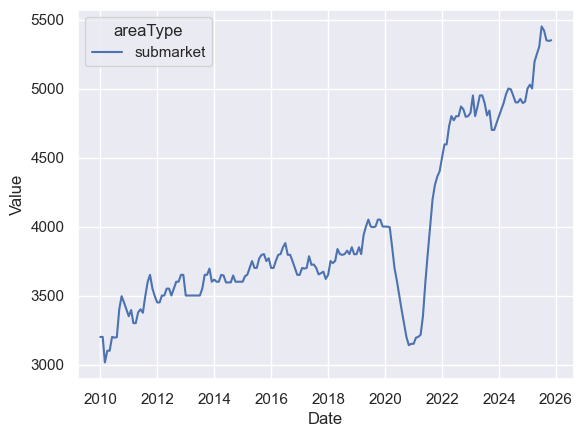

In [8]:
sns.lineplot(
    x='Date', y='Value', hue='areaType', data=downtown
)

<Axes: xlabel='Date', ylabel='Value'>

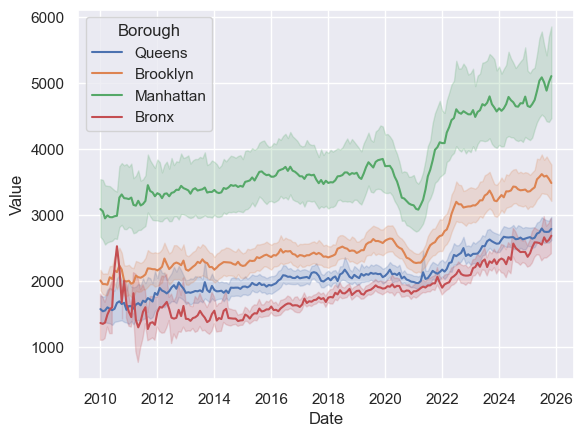

In [9]:
sns.lineplot(
    x='Date', y='Value', hue='Borough', data=df[df['areaType'] == 'neighborhood']
)

<Axes: xlabel='Date', ylabel='Value'>

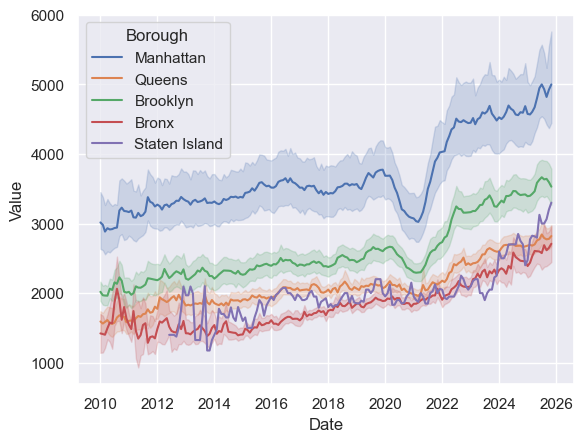

In [10]:
sns.lineplot(
    x='Date', y='Value', hue='Borough', data=df
)

In [11]:
df.to_csv("../data/rent_prices_long.csv", index=False, header=True)

In [12]:
df.head()

,areaName,Borough,areaType,Date,Value
0,All Downtown,Manhattan,submarket,2010-01-01,3200.0
1,All Midtown,Manhattan,submarket,2010-01-01,2875.0
2,All Upper East Side,Manhattan,submarket,2010-01-01,2450.0
3,All Upper Manhattan,Manhattan,submarket,2010-01-01,1825.0
4,All Upper West Side,Manhattan,submarket,2010-01-01,2895.0


In [13]:
df.groupby("areaName")["Value"].mean()

areaName
All Downtown           3952.738220
All Midtown            3664.361257
All Upper East Side    3085.884817
All Upper Manhattan    2353.178010
All Upper West Side    3552.465969
                          ...     
Windsor Terrace        2684.183246
Woodhaven              2037.330579
Woodlawn               1775.000000
Woodside               2050.362069
Woodstock              2005.605634
Name: Value, Length: 198, dtype: float64